# Deep learning loss functions

Inline plots:

In [1]:
%matplotlib inline

We want to use `Theano` so that we can use it's auto-differentiation, since I'm too lazy to work out the derivatives of these functions by hand! :)

We also want to avoid the overhead of using the GPU for such small tasks, so tell Theano to use the CPU:

In [2]:
import os
os.environ['THEANO_FLAGS'] = 'device=cpu'

In [3]:
import numpy as np
import pandas as pd
import theano, theano.tensor as T
from matplotlib import pyplot as plt
import seaborn as sns

EPSILON = 1.0e-12

SAVE_PLOTS = True

### Classification: softmax non-linearity with negative log loss

First define functions for computing softmax and negative log loss:

In [4]:
# Softmax definition
def softmax(logits):
    ex = T.exp(logits)
    return ex / ex.sum()

# Variable for logits
logits_var = T.vector()
# Theano function for softmax
f_softmax = theano.function([logits_var], softmax(logits_var))

# Negative log loss
def negative_log_loss(q, p):
    return -(T.log(q+EPSILON) * p).sum()

# Variable for true probability
p_var = T.vector()
# Theano function for negative log loss of softmax
f_clf_loss = theano.function([logits_var, p_var], negative_log_loss(softmax(logits_var), p_var))

# Theano function Gradient of loss
f_clf_loss_grad = theano.function([logits_var, p_var], T.grad(negative_log_loss(softmax(logits_var), p_var), wrt=logits_var))

Apply:

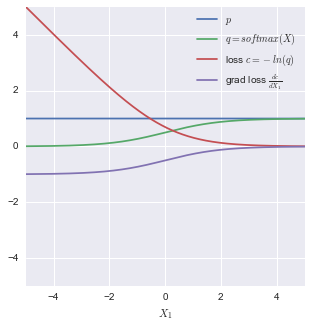

In [6]:
# Compute the range of values that we wish to explore
xs = np.arange(-5.0, 5.001, 1.0/128.0).astype(np.float32)

# Build an array of logit vector, where each logit vector is for a 2-class problem with the values [0, x[i]]
logits = [np.array([0.0, x]).astype(np.float32) for x in xs]

# Use softmax to compute predicted probabilities:
clf_q = [f_softmax(x) for x in logits]
clf_p = np.array([0.0, 1.0], dtype=np.float32)

# Compute negative log loss of softmax:
clf_loss = [f_clf_loss(x, clf_p) for x in logits]

# Compute gradient of negative log loss of softmax with respect to the logits:
clf_loss_grad = [f_clf_loss_grad(x, clf_p)[1] for x in logits]

plt.figure(figsize=(5, 5))
plt.xlim(-5.0, 5.0)
plt.ylim(-5.0, 5.0)
line_p, = plt.plot(xs, np.ones_like(xs), label=r'$p$')
line_q, = plt.plot(xs, [q[1] for q in clf_q], label=r'$q = softmax(X)$')
line_loss, = plt.plot(xs, clf_loss, label=r'loss $c =-ln(q)$')
line_loss_grad, = plt.plot(xs, clf_loss_grad, label=r'grad loss $\frac{dc}{dX_1}$')
plt.legend(handles=[line_p, line_q, line_loss, line_loss_grad])
plt.xlabel(r'$X_1$')
plt.show()

if SAVE_PLOTS:
    plt.figure(figsize=(5, 5))
    plt.xlim(-5.0, 5.0)
    plt.ylim(-5.0, 5.0)
    line_p, = plt.plot(xs, np.ones_like(xs), label=r'$p$')
    line_q, = plt.plot(xs, [q[1] for q in clf_q], label=r'$q = softmax(X)$')
    plt.legend(handles=[line_p, line_q])
    plt.xlabel(r'$X_1$')
    plt.savefig('clf_loss_0.png', dpi=600)
    plt.close()

    plt.figure(figsize=(5, 5))
    plt.xlim(-5.0, 5.0)
    plt.ylim(-5.0, 5.0)
    line_p, = plt.plot(xs, np.ones_like(xs), label=r'$p$')
    line_q, = plt.plot(xs, [q[1] for q in clf_q], label=r'$q = softmax(X)$')
    line_loss, = plt.plot(xs, clf_loss, label=r'loss $c =-ln(q)$')
    plt.legend(handles=[line_p, line_q, line_loss])
    plt.xlabel(r'$X_1$')
    plt.savefig('clf_loss_1.png', dpi=600)
    plt.close()

    plt.figure(figsize=(5, 5))
    plt.xlim(-5.0, 5.0)
    plt.ylim(-5.0, 5.0)
    line_p, = plt.plot(xs, np.ones_like(xs), label=r'$p$')
    line_q, = plt.plot(xs, [q[1] for q in clf_q], label=r'$q = softmax(X)$')
    line_loss, = plt.plot(xs, clf_loss, label=r'loss $c =-ln(q)$')
    line_loss_grad, = plt.plot(xs, clf_loss_grad, label=r'grad loss $\frac{dc}{dX_1}$')
    plt.legend(handles=[line_p, line_q, line_loss, line_loss_grad])
    plt.xlabel(r'$X_1$')
    plt.savefig('clf_loss_2.png', dpi=600)
    plt.close()

### Probability regression: sigmoid non-linearity with binary cross-entropy

First define functions for computing sigmoid and binary cross-entropy:

In [7]:
# Sigmoid definition
def sigmoid(x):
    return 1.0 / (1.0 + T.exp(-x))

# Variable for logit
logit_var = T.scalar()
# Theano function for softmax
f_sigmoid = theano.function([logit_var], sigmoid(logit_var))

# Binary cross-entropy
def binary_cross_entropy(q, p):
    return -((T.log(q+EPSILON) * p) + (T.log((1-q)+EPSILON) * (1-p))).sum()

# Variable for true probability
p_var = T.scalar()
# Theano function for binary cross-entropy of sigmoid
f_prob_regr_loss = theano.function([logit_var, p_var], binary_cross_entropy(sigmoid(logit_var), p_var))

# Theano function Gradient of loss
f_prob_regr_loss_grad = theano.function([logit_var, p_var],
                                        T.grad(binary_cross_entropy(sigmoid(logit_var), p_var), wrt=logit_var))

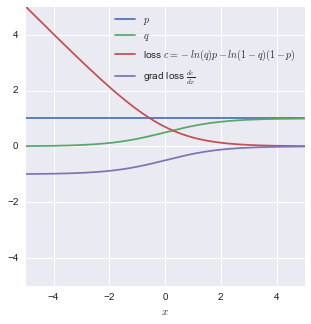

In [8]:
# Compute the range of values that we wish to explore
xs = np.arange(-5.0, 5.0, 0.01).astype(np.float32)

# Use sigmoid to compute predicted probabilities:
prob_regr_q = [f_sigmoid(x) for x in xs]

# Compute binary cross-entropy of sigmoid:
prob_regr_loss = [f_prob_regr_loss(x, 1.0) for x in xs]

# Compute gradient of binary cross-entropy of sigmoid with respect to xs:
prob_regr_loss_grad = [f_prob_regr_loss_grad(x, 1.0) for x in xs]

plt.figure(figsize=(5,5))
plt.xlim(-5.0, 5.0)
plt.ylim(-5.0, 5.0)
line_p, = plt.plot(xs, np.ones_like(xs), label=r'$p$')
line_q, = plt.plot(xs, prob_regr_q, label=r'$q$')
line_loss, = plt.plot(xs, prob_regr_loss, label=r'loss $c =-ln(q)p-ln(1-q)(1-p)$')
line_loss_grad, = plt.plot(xs, prob_regr_loss_grad, label=r'grad loss $\frac{dc}{dx}$')
plt.legend(handles=[line_p, line_q, line_loss, line_loss_grad])
plt.xlabel(r'$x$')
plt.show()

if SAVE_PLOTS:
    plt.figure(figsize=(5, 5))
    plt.xlim(-5.0, 5.0)
    plt.ylim(-5.0, 5.0)
    line_p, = plt.plot(xs, np.ones_like(xs), label=r'$p$')
    line_q, = plt.plot(xs, prob_regr_q, label=r'$q$')
    line_loss, = plt.plot(xs, prob_regr_loss, label=r'loss $c =-ln(q)p-ln(1-q)(1-p)$')
    line_loss_grad, = plt.plot(xs, prob_regr_loss_grad, label=r'grad loss $\frac{dc}{dx}$')
    plt.legend(handles=[line_p, line_q, line_loss, line_loss_grad])
    plt.xlabel(r'$x$')
    plt.savefig('prob_regr_loss_2.png', dpi=600)
    plt.close()


## Regression: no non-linearity and squared error loss

In [20]:
# Function for computing squared error
def squared_error(a, b):
    return T.square(a - b)

# Variables for predicted x (x-hat) true x (x)
x_hat_var = T.scalar()
x_var = T.scalar()

# Theano function for squared error loss
f_regr_sqr_loss = theano.function([x_hat_var, x_var], squared_error(x_hat_var, x_var))

# Theano function for gradient of squared error loss
f_regr_sqr_loss_grad = theano.function([x_hat_var, x_var],
                                       T.grad(squared_error(x_hat_var, x_var), wrt=x_hat_var))

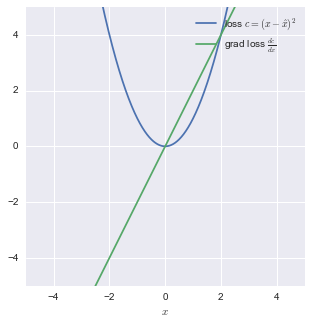

In [29]:
# Compute the range of values that we wish to explore
xs = np.arange(-5.0, 5.0, 0.01).astype(np.float32)

# Use squared error loss:
regr_sqr_loss = [f_regr_sqr_loss(x, 0.0) for x in xs]

# Compute gradient of squared error with respect to x-hat
regr_sqr_loss_grad = [f_regr_sqr_loss_grad(x, 0.0) for x in xs]

plt.figure(figsize=(5,5))
plt.xlim(-5.0, 5.0)
plt.ylim(-5.0, 5.0)
line_loss, = plt.plot(xs, regr_sqr_loss, label=r'loss $c = (x - \hat{x})^2$')
line_loss_grad, = plt.plot(xs, regr_sqr_loss_grad, label=r'grad loss $\frac{dc}{dx}$')
plt.legend(handles=[line_loss, line_loss_grad])
plt.xlabel(r'$x$')
plt.show()

if SAVE_PLOTS:
    plt.figure(figsize=(5, 5))
    plt.xlim(-5.0, 5.0)
    plt.ylim(-5.0, 5.0)
    line_loss, = plt.plot(xs, regr_sqr_loss, label=r'loss $c = (x - \hat{x})^2$')
    line_loss_grad, = plt.plot(xs, regr_sqr_loss_grad, label=r'grad loss $\frac{dc}{dx}$')
    plt.legend(handles=[line_loss, line_loss_grad])
    plt.xlabel(r'$x$')
    plt.savefig('regr_sqr_loss_2.png', dpi=600)
    plt.close()


## Regression: no non-linearity and Huber loss


In [24]:
# Function for computing squared error
def huber_loss(predictions, targets, delta=1.0):
    # Copied from: https://github.com/Sentient07/Lasagne/blob/cd45640e8e1a6da90d85e38bcc45fef8d2f6fbab/lasagne/objectives.py
    diff = targets - predictions
    ift = 0.5 * squared_error(targets, predictions)
    iff = delta * (abs(diff) - delta / 2.)
    return theano.tensor.switch(abs(diff) <= delta, ift, iff).sum()

# Variables for predicted x (x-hat) true x (x)
x_hat_var = T.scalar()
x_var = T.scalar()

# Theano function for squared error loss
f_regr_huber_loss = theano.function([x_hat_var, x_var], huber_loss(x_hat_var, x_var))

# Theano function for gradient of squared error loss
f_regr_huber_loss_grad = theano.function([x_hat_var, x_var],
                                       T.grad(huber_loss(x_hat_var, x_var), wrt=x_hat_var))

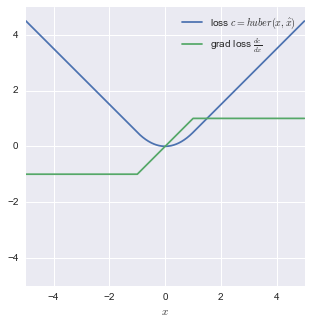

In [30]:
# Compute the range of values that we wish to explore
xs = np.arange(-5.0, 5.0, 0.01).astype(np.float32)

# Use Huber loss:
regr_sqr_loss = [f_regr_huber_loss(x, 0.0) for x in xs]

# Compute gradient of Huber loss with respect to x-hat
regr_sqr_loss_grad = [f_regr_huber_loss_grad(x, 0.0) for x in xs]

plt.figure(figsize=(5,5))
plt.xlim(-5.0, 5.0)
plt.ylim(-5.0, 5.0)
line_loss, = plt.plot(xs, regr_sqr_loss, label=r'loss $c = huber(x, \hat{x})$')
line_loss_grad, = plt.plot(xs, regr_sqr_loss_grad, label=r'grad loss $\frac{dc}{dx}$')
plt.legend(handles=[line_loss, line_loss_grad])
plt.xlabel(r'$x$')
plt.show()

if SAVE_PLOTS:
    plt.figure(figsize=(5, 5))
    plt.xlim(-5.0, 5.0)
    plt.ylim(-5.0, 5.0)
    line_loss, = plt.plot(xs, regr_sqr_loss, label=r'loss $c = huber(x, \hat{x})$')
    line_loss_grad, = plt.plot(xs, regr_sqr_loss_grad, label=r'grad loss $\frac{dc}{dx}$')
    plt.legend(handles=[line_loss, line_loss_grad])
    plt.xlabel(r'$x$')
    plt.savefig('regr_huber_loss_2.png', dpi=600)
    plt.close()


### Show the classification logits and probabilities in tables:

In [ ]:
data=np.array(logits)
pd.DataFrame(columns=['$X_0$', '$X_1$'], data=data[::128])

In [ ]:
data=np.append(np.array(logits), np.array(clf_q), axis=1)
pd.DataFrame(columns=['$X_0$', '$X_1$', '$q_0$', '$q_1$'], data=data[::128])